## Simulación del Examen (Core)

### Fundamentos de Data Science – Práctica para el Examen
La tarea es limpiar y explorar los datos para una compañía de tecnología emergente que desarrolla aplicaciones móviles. La empresa quiere mejorar la experiencia del usuario y aumentar la retención de usuarios en sus aplicaciones. Han recolectado datos sobre el uso de sus aplicaciones y quieren entender mejor cómo los usuarios interactúan con sus productos.

### Limpieza de Datos:
    - Identificar y abordar cualquier valor duplicado.
    - Identificar y abordar cualquier dato que falte en este conjunto de datos. Trátenlos de forma adecuada. Incluyan una breve descripción en el método que usan para tratar con los valores que faltan junto con una justificación para el uso de ese método.
    - Asegurarse de que todas las columnas coincidan con los tipos de datos enumerados en el diccionario de datos.
    - Identificar y abordar cualquier inconsistencia en los valores categóricos (ejemplo: android, Android, ANDROID).
    - Identificar y abordar cualquier punto de datos inapropiados o inusuales (ejemplo: tiempo de uso de 10000 horas en una semana).

### Exploración de Datos:
    - Dos tipos diferentes de visualizaciones exploratorias univariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.
    - Dos tipos diferentes de visualizaciones exploratorias multivariantes. Cada visualización debe incluir una breve interpretación dentro del archivo de código.

### Diccionario de Datos:
    - user_id: Identificación única del usuario.
    - app_version: Versión de la aplicación usada.
    - platform: Plataforma del dispositivo (Android, iOS).
    - session_duration: Duración de la sesión en minutos.
    - number_of_sessions: Número de sesiones en un día.
    - country: País del usuario.
    - user_feedback: Puntuación de la experiencia del usuario (1-5).


In [1]:
# Generar el dataframe
import pandas as pd
import numpy as np
import random

# Configuramos la semilla para reproducibilidad
np.random.seed(42)

# Generamos los datos sintéticos
user_id = range(1, 301)
app_version = np.random.choice(['1.0', '1.1', '1.2', '1.3'], 300)
platform = np.random.choice(['Android', 'iOS'], 300)
session_duration = np.random.randint(1, 180, 300)
number_of_sessions = np.random.randint(1, 20, 300)
country = np.random.choice(['USA', 'Canada', 'Mexico', 'UK', 'Germany', 'France', 'Spain', 'Italy'], 300)
user_feedback = np.random.randint(1, 6, 300)

# Creamos el DataFrame
data = pd.DataFrame({
    'user_id': user_id,
    'app_version': app_version,
    'platform': platform,
    'session_duration': session_duration,
    'number_of_sessions': number_of_sessions,
    'country': country,
    'user_feedback': user_feedback
})

# Guardamos los datos en un archivo CSV
data.to_csv('../data/user_app_data.csv', index=False)
print("Datos generados y guardados en 'user_app_data.csv'")

Datos generados y guardados en 'user_app_data.csv'


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# CARGA DE DATOS, LIMPIEZA Y VERIFICACION DE LA CONSISTENCIA DE LOS DATOS

# Cargar datos desde un archivo CSV
df = pd.read_csv('../data/user_app_data.csv')

# Ver las primeras
print("Primeras filas del DataFrame:")
print(df.head(3))

# Identificar valores nulos en todo el DataFrame
print(df.isnull().sum())
print('-----------------------------------------', end='\n')

# Identificar los tipos de datos en las columnas
print(df.dtypes)
print('-----------------------------------------', end='\n')

# Agrupar en categorias ('platform' y corroborar los datos)
grouped_df = df.groupby('platform')
# Imprimir el DataFrame agrupado
print(grouped_df.describe())
print('-----------------------------------------', end='\n')

Primeras filas del DataFrame:
   user_id  app_version platform  session_duration  number_of_sessions  \
0        1          1.2  Android               109                  11   
1        2          1.3  Android               116                  17   
2        3          1.0  Android                94                  13   

  country  user_feedback  
0  France              1  
1      UK              2  
2  France              5  
user_id               0
app_version           0
platform              0
session_duration      0
number_of_sessions    0
country               0
user_feedback         0
dtype: int64
-----------------------------------------
user_id                 int64
app_version           float64
platform               object
session_duration        int64
number_of_sessions      int64
country                object
user_feedback           int64
dtype: object
-----------------------------------------
         user_id                                                         \
 

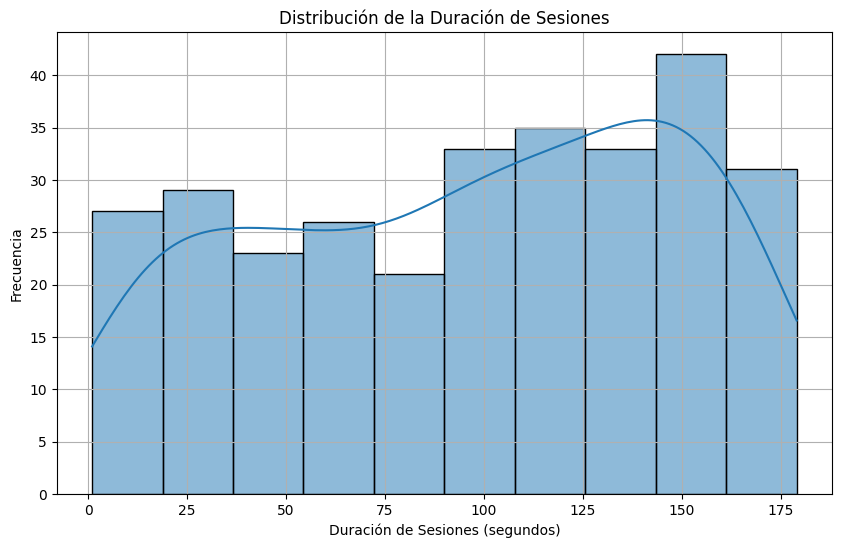

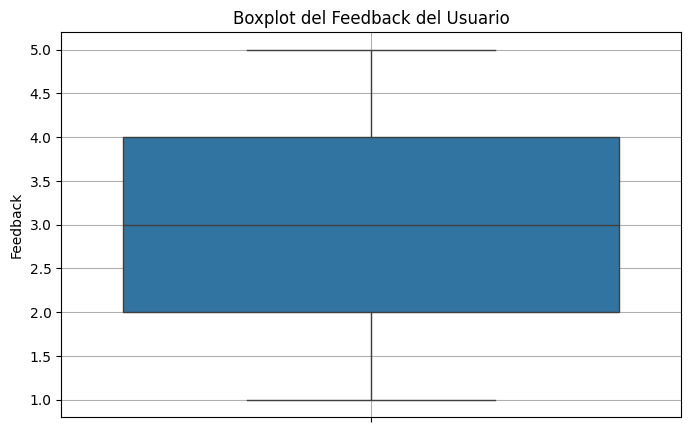

In [16]:
# VISUALIZACIONES UNIVARIANTE
# Visualización: Histograma de la duración de sesiones
plt.figure(figsize=(10, 6))
sns.histplot(df['session_duration'], bins=10, kde=True)
plt.title('Distribución de la Duración de Sesiones')
plt.xlabel('Duración de Sesiones (segundos)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

# Interpretación:
# La mayoría de las sesiones tienen una duración de menos de 100 segundos, 
# pero hay algunas sesiones más largas que superan los 150 segundos.


# Visualización: Boxplot del feedback del usuario
plt.figure(figsize=(8, 5))
sns.boxplot(y=df['user_feedback'])
plt.title('Boxplot del Feedback del Usuario')
plt.ylabel('Feedback')
plt.grid(True)
plt.show()

# Interpretación:
# La mayoría de los usuarios dan un feedback entre 1 y 5, 
# con algunos outliers que ofrecen un feedback mucho más bajo.

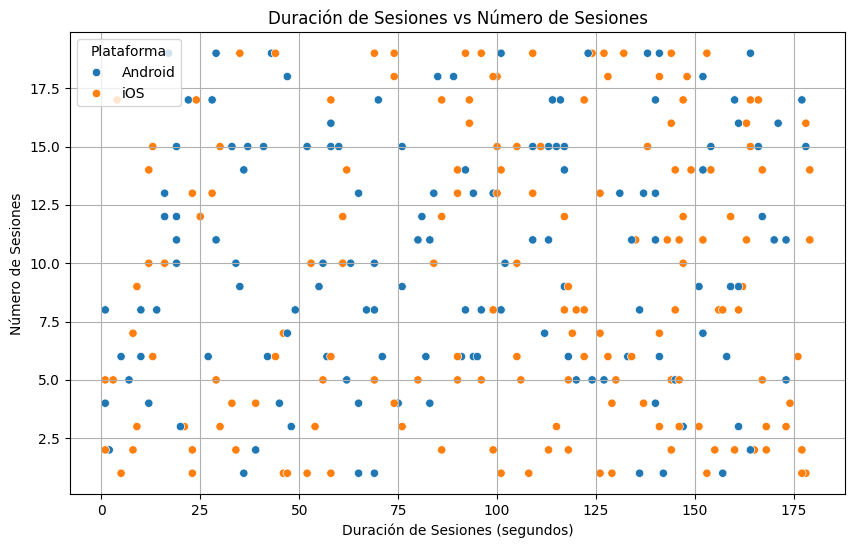

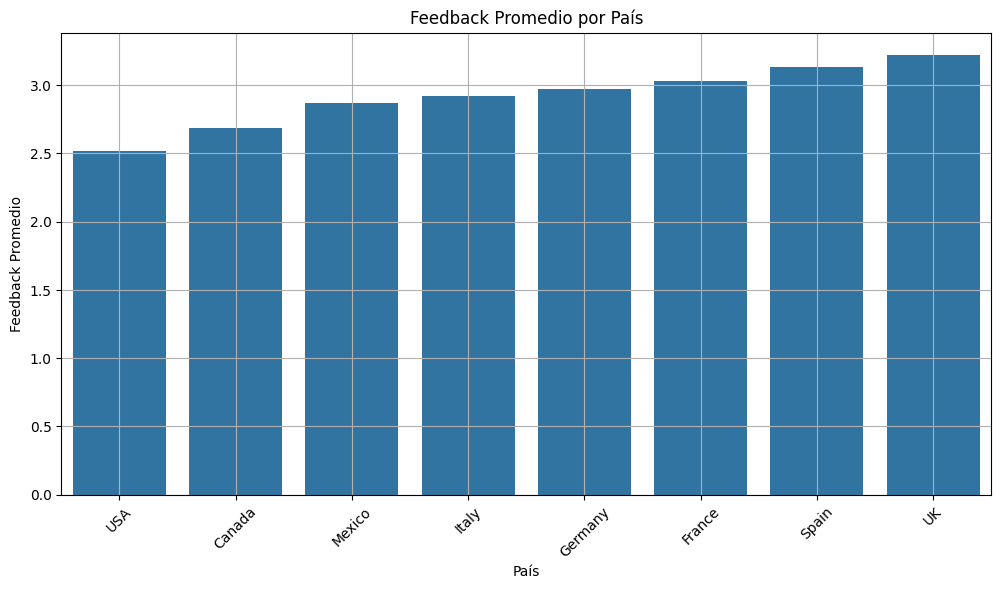

In [15]:
# VISUALIZACIONES MULTIVARIANTE
# Visualización: Gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='session_duration', y='number_of_sessions', hue='platform')
plt.title('Duración de Sesiones vs Número de Sesiones')
plt.xlabel('Duración de Sesiones (segundos)')
plt.ylabel('Número de Sesiones')
plt.legend(title='Plataforma')
plt.grid(True)
plt.show()

# Interpretación:
# La duración de las sesiones parece tener una relación positiva con el número de sesiones,
# especialmente para la plataforma Android.


# Visualización: Gráfico de barras del feedback promedio por país
plt.figure(figsize=(12, 6))
avg_feedback_country = df.groupby('country')['user_feedback'].mean().sort_values()
sns.barplot(x=avg_feedback_country.index, y=avg_feedback_country.values)
plt.title('Feedback Promedio por País')
plt.xlabel('País')
plt.ylabel('Feedback Promedio')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Interpretación:
# El feedback promedio varía entre los diferentes países, 
# lo que podría indicar diferencias en la experiencia del usuario.